# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [98]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [99]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [100]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\chewychevy\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


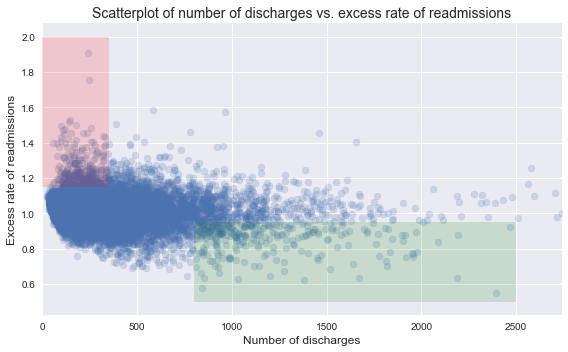

In [101]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [12]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [13]:
hospital_read_df.info()
hospital_read_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


A. Do you agree with the above analysis and recommendations? Why or why not?

**Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.**
This recommendation is unclear on what small capacity (< 300) means. It could mean a measurement of hospital size (e.g. hospital staff, patients in hospital care) or number of discharges. If it is a measurement of hospital size (hospital staff, patients in hospital care) it is a bad metric as the  data does not have any information on hospital size or its relation to number of discharges. The possibility exists therefore that there are many small hospitals with a large number of discharges

If we assume small capacity it means number of discharges and also assume that number of discharges is negatively correlated to the rate of readmission than its recommendation of "...upgraded resource allocation for quality care..." is too general. We know the readmission rate focuses on heart attack, heart failure and pneumonia. The resource allocation should focus on those three sections. Additionally "...to continue operation." implicates that the entire hospital/facility should be shut down if it does not demonstrate an improvement. At worse we should reduce funding to the hospital on heart attack, heart failure and pneumonia and not shut down the entire facility as it may provide excellent care in other areas not measured by our data.

**Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.**
Now it is clear the recommender means capacity as size of hospital. This recommendation has the same flaw as the previous in that it assumes hospital size is directly correlated with number of discharges when there is nothing in our data that supports that. 

Finally if we assume that hospital size is indeed related directly correlated to number of discharges this recommendation falls into the fallacy of correlation equals causation. There should instead be a focus of finding the cause of why small hospitals have a higher rate of re-admission for heart attack, heart failure and pneumonia compared to large hospitals. It also ignores the outliers of small hospitals with a low rate of re-admission and large hospitals that have a small rate of re-admission. 

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

B1. Setup an appropriate hypothesis test.
Null Hypothesis is that number of discharges is completely independent to rate of readmission.

The test statistic will be the Pearson correlation coefficient (rho) between number of discharges and rate of readmission

In [102]:
# Pearson Correlation Coefficient (rho) Equation
def pearson_r(x, y):
    correlation_matrix = np.corrcoef(x, y)
    correlation_of_x_y = correlation_matrix[0,1]
    return correlation_of_x_y

# Calculate and print sample rho value r_obs between number of discharges x and 
# rate of readmission y
r_obs = pearson_r(x, y)

# print the value
print('Sample Pearson correlation coefficient: ', r_obs)

Sample Pearson correlation coefficient:  -0.0930955428759


In [103]:
# Run permutations assuming true null hypothesis.

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw 10,000 replicates
for i in range (10000):
    # Permute number of discharges x
    x_permuted = np.random.permutation(x)

    # Compute Pearson Correlation
    perm_replicates[i] = pearson_r(x_permuted, y)
    
# Calculate P value
p = np.sum(perm_replicates <= r_obs) / len(perm_replicates)
print('B2. Calculate the p-value') 
print('p-value = ', p)

B2. Calculate the p-value
p-value =  0.0


B3. Report statistical significance for  αα  = .01.
For alpha = .01 our sample Pearson correlation coefficient between number of discharges and rate of readmission is statistically significant. 

B4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
Practically though the rho value of -0.0931 means that number of discharges and rate of readmission is only slighty negatively correlated. Even if we assume hospital size is correlated to number of discharges, this counters Section C. Conclusions of the Preliminary report in that number of discharges is not highly negatively correlated to rate of readmission.

B5. Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?

Advantages
- Shows all of the data including outliers 
- Data is scaled properly on x and y axis
- Color bars help focus attention

Disadvantages
- Hard to see population sizes accurately
- Y axis and chart title is labeled incorrectly as excess rate of readmissions adding bias to title
- Gridlines are a distraction

Construct another plot that conveys the same information in a more direct manner.

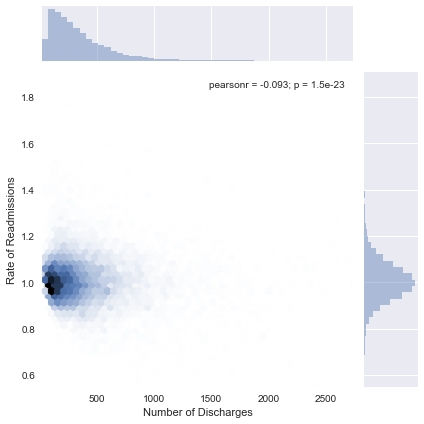

In [105]:
df = pd.DataFrame(x)
df['y'] = y
df.columns = ['Number of Discharges', 'Rate of Readmissions']
df.head()
_ = sns.jointplot('Number of Discharges', 'Rate of Readmissions', 
                  data=df, kind='hex')
plt.show()